#### Ventas como función de la inversión en anuncios puplicitarios.

Se crearán diferentes modelos para predecir la cantidad de ventas en función de la inversión en anuncios publicitarios en TV, Radio y Prensa. 

Lo primero que debe hacerse es tener claro que el ejercicios es un ejercicio de regresión. Se hace explícito que la varialble objetivo, es decir, la variable que se quiere modelar, son las ventas.

Los datos se tomarán de internet.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
url = 'https://raw.githubusercontent.com/Kaushik-Varma/linear_regression_model_python/main/Company_data.csv'

# si se desea un trabajo en local, se debe acceder a la dirección o url y descargar los datos.

In [4]:
data = pd.read_csv(url)
data.head() # una mirada a las primeras cinco filas de datos
data.tail() # una mirada a las últimas cinco filas de datos
data.head(2) # una mirada a las dos primeras filas de datos

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [5]:
# la forma de acceder a los nombre de todas las columnas del DataFrame de datos es:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Se hace una exploración inicial de los datos mediante los métodos `.info()` y `.describe()`

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Podemos ver que hay 200 entradas y que todas son no nulas. Todos los datos son de tipo float, así que no encontramos variables categóricas.

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Como se puede notar en la tabla resumen, los atributos TV, Radio y Newspaper tienen diferentes mínimos y máximos. Es decir, hay diferentes escalas en sus mediciones.

Recuerde que $25\%$ es el primer cuartil y nos indica que el $25\%$ de los datos están por debajo o igual que el valor correspondiente.  $50\%$ indica la mediana y $75\%$ indica el tercer cuartil.

**Preparar los datos para los algoritmos**:

Se deben limpiar los datos, remover los datos atípicos, llenar los datos faltantes. Se deben eliminar atributos que no sean de mucha utilidad. Además los datos se deben normalizar.

**Aproximación gráfica inicial a los datos**
Una forma de leer los datos al inicio es mediante los histogramas. Lo haremos por cada variable, aunque se puede hacer de forma automática para todas las variables, lo cuál es últil particularmente en este caso que se tienen pocas columnas en los datos. 

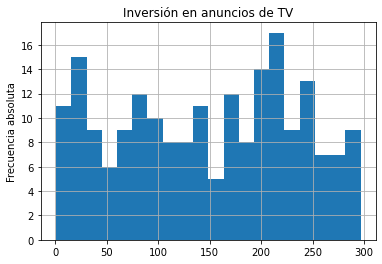

In [8]:
data['TV'].hist(bins=20) # bins es la cantidad de contenedores en el histograma
plt.title("Inversión en anuncios de TV")
plt.ylabel("Frecuencia absoluta")
plt.show()

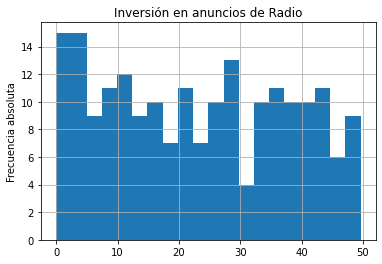

In [9]:
data['Radio'].hist(bins=20) 
plt.title("Inversión en anuncios de Radio")
plt.ylabel("Frecuencia absoluta")
plt.show()

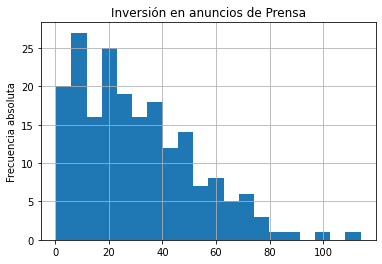

In [10]:
data['Newspaper'].hist(bins=20) 
plt.title("Inversión en anuncios de Prensa")
plt.ylabel("Frecuencia absoluta")
plt.show()

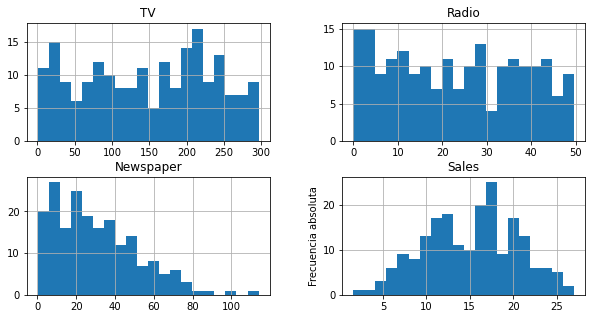

In [11]:
data.hist(bins=20, figsize=(10,5)) # aplica sobre todas las variables
plt.ylabel("Frecuencia absoluta")
plt.show()

Solamente la variable ventas tiene una distribución acampanada. Podemos estimar la varianza y la desviación estándar para hacer una lectura de la regla "68-95-99.7", la cual dice que $68\%, 95\%$ y $99\%$ de los datos, caen en intervalos centrados en la media y de radios $1\sigma, 2 \sigma$ y $3\sigma$ respectivamente.

In [12]:
media_de_ventas = data['Sales'].mean()
varianza_de_ventas = data['Sales'].var()
sigma = data['Sales'].std()
print("media: ", media_de_ventas)
print("desviación: ", sigma)
print(f'Valores a menos de una desviación de la media, están entre {media_de_ventas - sigma} y {media_de_ventas + sigma}')
print(f'Valores a menos de dos desviación de la media, están entre {media_de_ventas - 2 * sigma} y {media_de_ventas + 2 * sigma}')
print(f'Valores a menos de tres desviación de la media, están entre {media_de_ventas - 3 * sigma} y {media_de_ventas + 3 * sigma}')

media:  15.130500000000001
desviación:  5.283892252561876
Valores a menos de una desviación de la media, están entre 9.846607747438124 y 20.41439225256188
Valores a menos de dos desviación de la media, están entre 4.562715494876249 y 25.698284505123752
Valores a menos de tres desviación de la media, están entre -0.7211767576856261 y 30.98217675768563


Se debe crear un subconjunto de datos para ponerlo a un lado y nunca usarlo en entrenamientos.
El proceso de visualización de datos, previo al entrenamiento, no se debe llevar al exceso. El cerebro humano es una máquina poderosa de reconocimiento de
patrones y practicar el *data snooping* sobre los datos para testear puede fomentar errores de generalización.

Scikit-Learn tiene funciones para rebanar datasets en subconjuntos. Una de ellas es ```train_test_split()```. Dicha función admite un parámetro
**random_state** para aleatorios reproducibles y se le puede pasar varios arrays (necesario en aprendizaje supervisado) para rebanados correspondientes en cada array.



In [13]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [14]:
print(train_set.shape, test_set.shape)

(160, 4) (40, 4)


Ahora se recomienda separar la variable objetivo.

In [15]:
atributos = ['TV', 'Radio', "Newspaper"]
variable_objetivo = ['Sales']
ventas_train = train_set[variable_objetivo]
ventas_test = test_set[variable_objetivo]
anuncios_train = train_set[atributos]
anuncios_test = test_set[atributos]
print(anuncios_train.shape, anuncios_test.shape, ventas_train.shape, ventas_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


Una forma gráfica de verificar relaciones lineales es mediante los `plot` de tipo `scatter`:

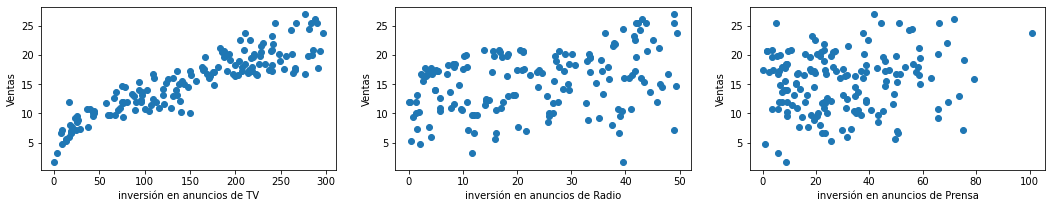

In [16]:
fig, ax = plt.subplots(1,3, figsize=(18, 3))
ax[0].scatter(anuncios_train['TV'], ventas_train)
ax[0].set_xlabel("inversión en anuncios de TV")
ax[0].set_ylabel('Ventas')
ax[1].scatter(anuncios_train['Radio'], ventas_train)
ax[1].set_xlabel("inversión en anuncios de Radio")
ax[1].set_ylabel('Ventas')
ax[2].scatter(anuncios_train['Newspaper'], ventas_train)
ax[2].set_xlabel("inversión en anuncios de Prensa")
ax[2].set_ylabel('Ventas')
plt.show()

El método ```.corr()``` calcula el coeficiente de correlación entre cada par de atributos.

In [17]:
data.corr() # es un DataFrame

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Interesa mucho la relación con la variable objetivo. Para ello se indica la columna que corresponde a la variable objetivo y se puede hacer un ordenamiento de las variables con mayor correlación lineal. Notará coherencia entre los valores y los gráficos, al evidenciar que la variable con mayor correlación es la de inversión en anuncios de TV.

In [18]:
data.corr()['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

El coeficiente de correlación se mueve entre $-1$ y $1$.
Cuando el valor es cercano a $1$, se dice que hay correlación positiva fuerte.

El coeficiente de correlación solo mide las correlaciones **lineales**. Se puede dar el caso
de coeficiente $0$ con variables claramente dependientes en términos de una relación no lineal.
El coeficiente de correlación nada tiene que ver con la pendiente de la "recta" cuando hay correlación fuerte.


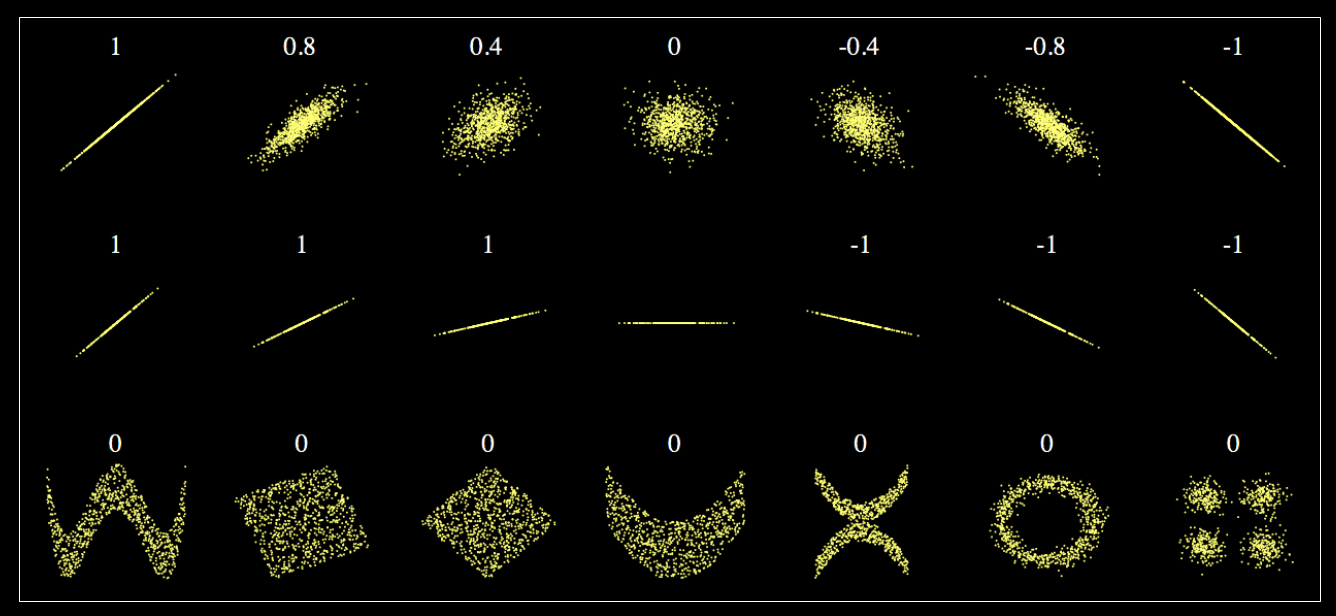

In [19]:
from IPython.display import Image
Image('correlaciones.png', width=800, height=400)

Otra manera de verificar correlaciones entre atributos es usar la función de pandas ```scatter_matrix()```, la
que grafica cada atributo numérico contra cada uno de los otros. Un ejemplo con cuatro atributos prometedores, es:


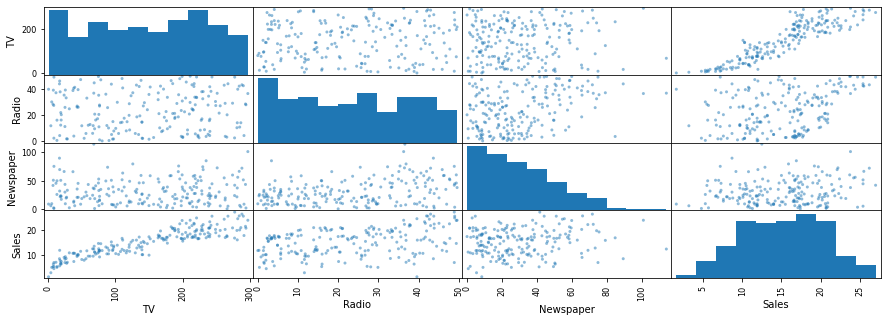

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(15,5))
plt.show()

El conjunto de datos que se está manipulando, no tiene datos faltantes, pero es una buena práctica hacer una limpieza de los datos eliminando las filas que presentan datos faltantes y ello se hace con el método `.dropna()`

In [21]:
# for tabla in [anuncios_train, anuncios_test, ventas_train, ventas_test]:
#     tabla.dropna()

Otra estrategia es la de inputar datos, es decir, llenas datos nulos con otros valores. Existe una clase en sklearn que ayuda a tales fines y es la clase `SimpleImputer`

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(anuncios_train) # acá se calcula la mediana por columnas 

X = imputer.transform(anuncios_train) # X es ndarray. No es un DataFrame, por ser salida de un transformador

anuncios_train = pd.DataFrame(X, columns=anuncios_train.columns,
                                    index=anuncios_train.index)
anuncios_train.head(2)

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

TV_ix, Radio_ix, Newspaper_ix = 0, 1, 2

class SelectorDeAtributos(BaseEstimator, TransformerMixin):
    def __init__(self, quita_prensa_escrita=False):
        self.quita_prensa_escrita = quita_prensa_escrita
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.quita_prensa_escrita:
            return np.c_[X[:, TV_ix], X[:, Radio_ix]]
        else:
            return np.c_[X[:, TV_ix], X[:, Radio_ix], X[:, Newspaper_ix]]


In [24]:
selector = SelectorDeAtributos(quita_prensa_escrita=True)
dos_cols = selector.transform(anuncios_train.values)


**Pipelines**

Secuencias de transformaciones de los datos

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_anuncios = Pipeline([
                    ('imputer', SimpleImputer(strategy="median")),
                    ("selector", SelectorDeAtributos(quita_prensa_escrita=False)),
                    ('scaler', StandardScaler())
])

anuncios_train_preparado = pipeline_anuncios.fit_transform(anuncios_train)
anuncios_train_preparado[:3]

array([[-0.40424839, -1.02823707, -0.33767538],
       [ 0.32060772, -0.91982774, -1.16143931],
       [-1.27051084,  0.2591237 ,  0.25425079]])

**Seleccionar un modelo y entrenarlo**

Dado que ya se formuló el problema, se exploraron los datos, se separaron los datos en entrenamiento y testeo, se crearon los
pipelines para limpiar y preparar los datos para los algoritmos, entonces ahora se comienza a seleccionar y a entrenar el modelo.

In [26]:
# comenzamos por una regresión lineal

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(anuncios_train_preparado, ventas_train)
# veamos como poner a trabajar el modelo ya entrenado
algunos_datos = anuncios_train.iloc[:5]
algunas_ventas = ventas_train.iloc[:5]
algunos_datos_preparados = pipeline_anuncios.transform(algunos_datos)
print("Predicciones: ", lin_reg.predict(algunos_datos_preparados))
print("Ventas reales: ", algunas_ventas)

Predicciones:  [[11.91465765]
 [15.32881375]
 [ 9.91093345]
 [ 9.46132618]
 [17.23412363]]
Ventas reales:       Sales
79    11.0
197   14.8
38    10.1
24     9.7
122   16.6


**Validación Cruzada**

El siguiente código rebanará aleatoriamente el conjunto de entrenamiento en 10 subconjunto (*folds*), entrenará y evaluará el modelo 10 veces, seleccionando
un *fold* distinto para evaluar y entrenando sobre los 9 *folds* restantes cada vez. El resultado es un array que contiene los 10 puntajes de evaluación.

Cuidado! En Scikit-Learn los atributos de validación cruzada otorgan una función de utilidad y no una función de pérdida, por lo tanto,
los puntajes obtenidos son los valores negativos de MSE y por eso se propone *-scores* en el cálculo.


In [27]:
from sklearn.model_selection import cross_val_score
puntajes = cross_val_score(lin_reg, anuncios_train_preparado, ventas_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse = np.sqrt(-puntajes)

In [28]:
# ahora se ven los resultados
def desplegar_puntajes(puntajes):
    print("puntajes: ", puntajes)
    print("promedio: ", puntajes.mean())
    print("desviación estándar: ", puntajes.std())

desplegar_puntajes(lin_reg_rmse)

puntajes:  [1.40105539 1.71465899 1.57120925 1.65807334 1.4835742  1.91862151
 1.46830109 1.42452433 2.40895705 1.41746142]
promedio:  1.6466436583791366
desviación estándar:  0.2976765926766672


Debemos entrenar otro modelo y comparar

In [29]:
from sklearn.linear_model import Ridge

lin_reg_ridge = Ridge(alpha=1)
lin_reg_ridge.fit(anuncios_train_preparado, ventas_train)

Ridge(alpha=1)

In [30]:
puntajes_ridge = cross_val_score(lin_reg_ridge, anuncios_train_preparado, ventas_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_ridge_rmse = np.sqrt(-puntajes_ridge)

In [31]:
desplegar_puntajes(lin_reg_ridge_rmse)

puntajes:  [1.41545471 1.70247038 1.57728278 1.65148317 1.47467018 1.92579093
 1.45880059 1.42359251 2.42071694 1.41377351]
promedio:  1.6464035704025264
desviación estándar:  0.3012227714505467


In [32]:
from sklearn.linear_model import Lasso

lin_reg_Lasso = Lasso(alpha=0.01)
lin_reg_Lasso.fit(anuncios_train_preparado, ventas_train)

puntajes_Lasso = cross_val_score(lin_reg_Lasso, anuncios_train_preparado, ventas_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_Lasso_rmse = np.sqrt(-puntajes_Lasso)

desplegar_puntajes(lin_reg_Lasso_rmse)

puntajes:  [1.39984943 1.71162177 1.57293409 1.65875709 1.48029248 1.92277806
 1.46321293 1.42581059 2.41432939 1.41508633]
promedio:  1.6464672167220649
desviación estándar:  0.30000104209881373


Una vez notamos el desempeño por validación cruzada, notamos que Rigde es un modelo prometedor. Luego se selecciona y se mira su desempeño, ahora sí, en el conjunto de testeo.

In [33]:
from sklearn.metrics import mean_absolute_error

anuncios_test_prepadados = pipeline_anuncios.transform(anuncios_test)
predicciones_de_ventas = lin_reg_ridge.predict(anuncios_test_prepadados)

mse_final = mean_absolute_error(ventas_test, predicciones_de_ventas)
rmse_final = np.sqrt(mse_final)
rmse_final


1.1284711657899158